Simple optimization problem

In [1]:
import pyomo.environ as pyo

# Create a model
model = pyo.ConcreteModel()

# Define the variables
model.a = pyo.Var(within=pyo.NonNegativeReals)
model.b = pyo.Var(within=pyo.NonNegativeReals)
model.c = pyo.Var(within=pyo.NonNegativeReals)

# Define the constraints
model.constraint1 = pyo.Constraint(expr = 3*model.a + 6*model.b + 2*model.c <= 50)
model.constraint2 = pyo.Constraint(expr = 4*model.a - 6*model.b + 8*model.c <= 45)
model.constraint3 = pyo.Constraint(expr = 3*model.a + model.b - 5*model.c <= 37)

# Define the objective function
model.objective = pyo.Objective(expr = 3*model.a + 2*model.b + 2*model.c, sense=pyo.maximize)

# Solve the model
solver = pyo.SolverFactory('glpk')
solver.solve(model)

# Display the results
a = pyo.value(model.a)
b = pyo.value(model.b)
c = pyo.value(model.c)
objective_value = pyo.value(model.objective)

print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print(f"Objective value = {objective_value}")

a = 12.7272727272727
b = 1.77272727272727
c = 0.590909090909091
Objective value = 42.90909090909082


Produce data

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(df):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].hist(df['a'], bins=20, color='b', alpha=0.7)
    axs[0, 0].set_title('Histogram of a')
    axs[0, 1].hist(df['b'], bins=20, color='r', alpha=0.7)
    axs[0, 1].set_title('Histogram of b')
    axs[1, 0].hist(df['c'], bins=20, color='g', alpha=0.7)
    axs[1, 0].set_title('Histogram of c')
    axs[1, 1].hist(df['objective_value'], bins=20, color='y', alpha=0.7)
    axs[1, 1].set_title('Histogram of the objective value')
    plt.show()

# Sample random float univariate
def get_value():
    return round(random.uniform(0, 20), 2)


df = pd.DataFrame(columns=['a', 'b', 'c', 'objective_value'])

for i in range(1000):
    a, b, c = get_value(), get_value(), get_value()
    df.loc[i] = [a, b, c, 3*a + 2*b + 2*c]

df.head()

,a,b,c,objective_value
0,1.74,2.89,14.79,40.58
1,19.23,18.33,10.74,115.83
2,18.12,4.99,0.91,66.16
3,19.67,12.33,4.89,93.45
4,11.55,7.13,19.06,87.03


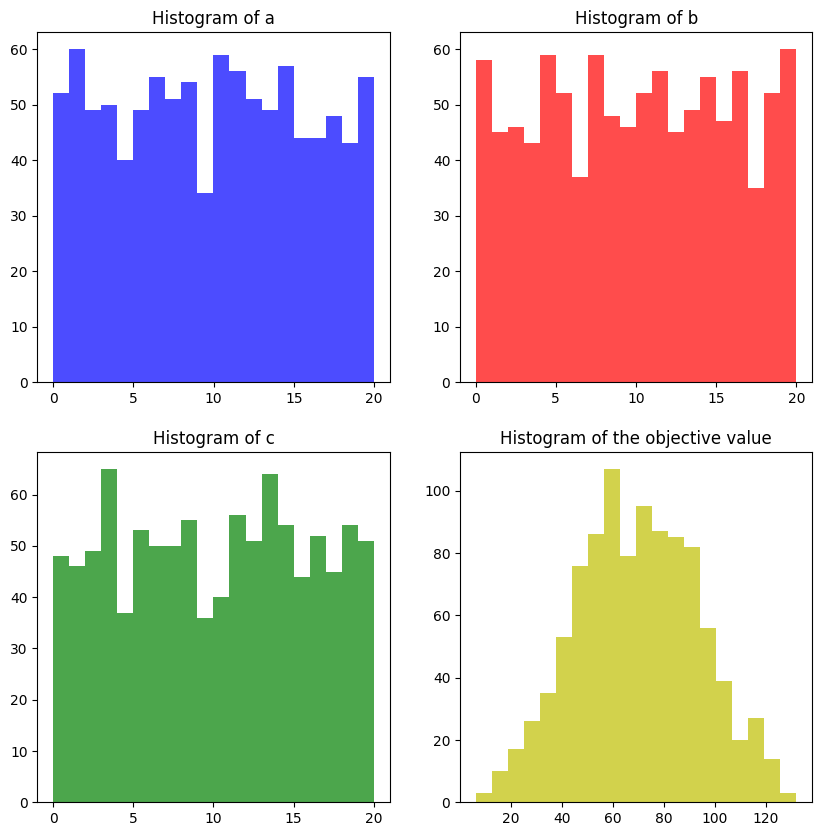

In [3]:
plot_histograms(df)

ML-based optimization

In [4]:
# import the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import pyomo.environ as pyo
import tensorflow.keras as keras
from omlt import OffsetScaling, OmltBlock
from omlt.io.keras import load_keras_sequential
from omlt.neuralnet import FullSpaceSmoothNNFormulation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def loss_curve(history):
    plt.figure(figsize=(10,2))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Loss Curve')
    plt.show()

inputs = ['a', 'b', 'c']    
outputs = ['objective_value']


'_BlockData'. The class '_BlockData' has been renamed to 'BlockData'.
(deprecated in 6.7.2) (called from
c:\Users\mexis\anaconda3\envs\main\lib\site-packages\omlt\block.py:33)


In [5]:
# We scale the data for improved training, however, we want to formulate
# our optimizaton problem on the original variables. Therefore, we keep
# the scaling parameters to use later in our optimization formulation
dfin = df[inputs]
dfout = df[outputs]

x_offset, x_factor = dfin.mean().to_dict(), dfin.std().to_dict()
y_offset, y_factor = dfout.mean().to_dict(), dfout.std().to_dict()

dfin = (dfin - dfin.mean()).divide(dfin.std())
dfout = (dfout - dfout.mean()).divide(dfout.std())

# capture the minimum and maximum values of the scaled inputs
# so we don't use the model outside the valid range
scaled_lb = dfin.min()[inputs].values
scaled_ub = dfin.max()[inputs].values

x = dfin[inputs].values
y = dfout[outputs].values


Epoch 1/100

2/2 - 1s - loss: 2.3591 - val_loss: 0.9483 - 876ms/epoch - 438ms/step
Epoch 2/100
2/2 - 0s - loss: 1.1948 - val_loss: 3.1770 - 38ms/epoch - 19ms/step
Epoch 3/100
2/2 - 0s - loss: 2.8923 - val_loss: 0.4430 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3796 - val_loss: 1.0871 - 44ms/epoch - 22ms/step
Epoch 5/100
2/2 - 0s - loss: 1.1905 - val_loss: 1.0659 - 38ms/epoch - 19ms/step
Epoch 6/100
2/2 - 0s - loss: 0.8697 - val_loss: 0.0532 - 49ms/epoch - 24ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1562 - val_loss: 0.8295 - 50ms/epoch - 25ms/step
Epoch 8/100
2/2 - 0s - loss: 0.8415 - val_loss: 0.3645 - 43ms/epoch - 22ms/step
Epoch 9/100
2/2 - 0s - loss: 0.3142 - val_loss: 0.1522 - 35ms/epoch - 18ms/step
Epoch 10/100
2/2 - 0s - loss: 0.2053 - val_loss: 0.5186 - 44ms/epoch - 22ms/step
Epoch 11/100
2/2 - 0s - loss: 0.4769 - val_loss: 0.1133 - 49ms/epoch - 25ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0949 - val_loss: 0.1426 - 37ms/epoch - 18ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1

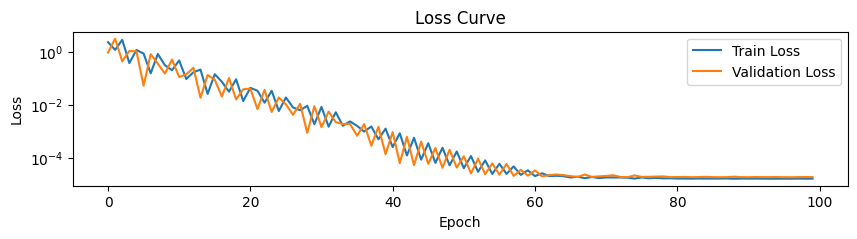

In [7]:
# Create a simple ANN using Keras
model = Sequential()
model.add(Dense(512, input_dim=x.shape[1], activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
history = model.fit(x, y, epochs=100, batch_size=512, validation_split=.33, verbose=2)

# save the model to disk
model.save('reformer_nn.keras')

# Plot loss curve
loss_curve(history)

In [8]:
m = pyo.ConcreteModel()
m.reformer = OmltBlock()
nn_reformer = keras.models.load_model('reformer_nn.keras', compile=False)

scaler = OffsetScaling(
        offset_inputs={i: x_offset[inputs[i]] for i in range(len(inputs))},
        factor_inputs={i: x_factor[inputs[i]] for i in range(len(inputs))},
        offset_outputs={i: y_offset[outputs[i]] for i in range(len(outputs))},
        factor_outputs={i: y_factor[outputs[i]] for i in range(len(outputs))}
    )

scaled_input_bounds = {i: (scaled_lb[i], scaled_ub[i]) for i in range(len(inputs))}

net = load_keras_sequential(nn_reformer, scaling_object=scaler, scaled_input_bounds=scaled_input_bounds) 
m.reformer.build_formulation(FullSpaceSmoothNNFormulation(net))

In [9]:
a_idx = inputs.index('a')
b_idx = inputs.index('b')
c_idx = inputs.index('c')

# Add objective and constraints
m.obj = pyo.Objective(expr=m.reformer.outputs[0], sense=pyo.maximize)
m.constraint1 = pyo.Constraint(expr=3*m.reformer.inputs[a_idx] + 6*m.reformer.inputs[b_idx] + 2*m.reformer.inputs[c_idx] <= 50)
m.constraint2 = pyo.Constraint(expr=4*m.reformer.inputs[a_idx] - 6*m.reformer.inputs[b_idx] + 8*m.reformer.inputs[c_idx] <= 45)
m.constraint3 = pyo.Constraint(expr=3*m.reformer.inputs[a_idx] + m.reformer.inputs[b_idx] - 5*m.reformer.inputs[c_idx] <= 37)

# Solve
solver = pyo.SolverFactory('ipopt')
status = solver.solve(m, tee=True)

print(f"Objective value: {pyo.value(m.obj)}")
print(f"a: {m.reformer.inputs[0].value}")
print(f"b: {m.reformer.inputs[1].value}")
print(f"c: {m.reformer.inputs[2].value}")

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:     3603
Number of nonzeros in inequality constraint Jacobian.:        9
Number of nonzeros in Lagrangian Hessian.............:      512

Total number of variables............................:     1037
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1035
